## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## L2

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.2038 - acc: 0.2601 - val_loss: 2.0279 - val_acc: 0.3288
Epoch 2/50
50000/50000 [==============================] - 16s 329us/step - loss: 1.9561 - acc: 0.3637 - val_loss: 1.9141 - val_acc: 0.3749
Epoch 3/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.8704 - acc: 0.3928 - val_loss: 1.8423 - val_acc: 0.4056
Epoch 4/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.8088 - acc: 0.4160 - val_loss: 1.7876 - val_acc: 0.4232
Epoch 5/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.7584 - acc: 0.4338 - val_loss: 1.7463 - val_acc: 0.4351
Epoch 6/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.7162 - acc: 0.4466 - val_loss: 1.7191 - val_acc: 0.4448
Epoch 7/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.6815 - acc: 0.4589 - val_loss: 1.

50000/50000 [==============================] - 18s 350us/step - loss: 2.0369 - acc: 0.2773 - val_loss: 1.8704 - val_acc: 0.3414
Epoch 2/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.8080 - acc: 0.3685 - val_loss: 1.7528 - val_acc: 0.3931
Epoch 3/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.7221 - acc: 0.3969 - val_loss: 1.6848 - val_acc: 0.4161
Epoch 4/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.6627 - acc: 0.4176 - val_loss: 1.6354 - val_acc: 0.4301
Epoch 5/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.6135 - acc: 0.4339 - val_loss: 1.6027 - val_acc: 0.4415
Epoch 6/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.5725 - acc: 0.4510 - val_loss: 1.5857 - val_acc: 0.4420
Epoch 7/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.5368 - acc: 0.4629 - val_loss: 1.5392 - val_acc: 0.4634
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.8026 - acc: 0.3692 - val_loss: 1.7534 - val_acc: 0.3863
Epoch 3/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.7212 - acc: 0.3980 - val_loss: 1.6934 - val_acc: 0.4085
Epoch 4/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.6626 - acc: 0.4191 - val_loss: 1.6410 - val_acc: 0.4237
Epoch 5/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.6142 - acc: 0.4356 - val_loss: 1.6042 - val_acc: 0.4342
Epoch 6/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.5775 - acc: 0.4487 - val_loss: 1.5685 - val_acc: 0.4470
Epoch 7/50
50000/50000 [==============================] - 16s 326us/step - loss: 1.5425 - acc: 0.4588 - val_loss: 1.5513 - val_acc: 0.4527
Epoch 8/50
50000/50000 [==============================] - 16s 320us/step - loss: 1.5121 - acc: 0.4701 - val_loss: 1.5352 - val_acc: 0.4530
Epoch 9/50
50000/50000 [===

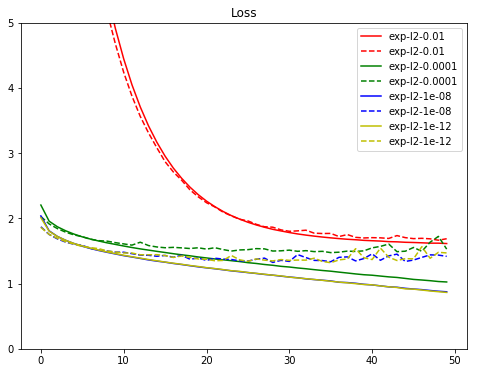

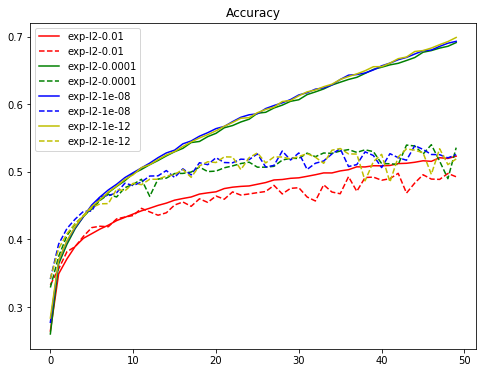

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## L1

In [11]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 193us/step - loss: 5.9854 - acc: 0.2766 - val_loss: 5.7866 - val_acc: 0.3555
Epoch 2/50
50000/50000 [==============================] - 9s 180us/step - loss: 5.6980 - acc: 0.3725 - val_loss: 5.6124 - val_acc: 0.3899
Epoch 3/50
50000/50000 [==============================] - 9s 181us/step - loss: 5.5531 - acc: 0.4012 - val_loss: 5.4882 - val_acc: 0.4132
Epoch 4/50
50000/50000 [==============================] - 9s 181us/step - loss: 5.4316 - acc: 0.4220 - val_loss: 5.3817 - val_acc: 0.4290
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 5.3242 - acc: 0.4372 - val_loss: 5.2836 - val_acc: 0.4350
Epoch 6/50
50000/50000 [==============================] - 9s 181us/step - loss: 5.2255 - acc: 0.4508 - val_loss: 5.1901 - val_acc: 0.4503
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 5.1335 - acc: 0.4587 - val_loss: 5.1041 -

Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.8189 - acc: 0.3618 - val_loss: 1.7712 - val_acc: 0.3778
Epoch 3/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7337 - acc: 0.3921 - val_loss: 1.6997 - val_acc: 0.3997
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6727 - acc: 0.4141 - val_loss: 1.6499 - val_acc: 0.4154
Epoch 5/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6263 - acc: 0.4292 - val_loss: 1.6112 - val_acc: 0.4397
Epoch 6/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5872 - acc: 0.4449 - val_loss: 1.5891 - val_acc: 0.4385
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5535 - acc: 0.4546 - val_loss: 1.5592 - val_acc: 0.4530
Epoch 8/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5249 - acc: 0.4631 - val_loss: 1.5357 - val_acc: 0.4613
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 9s 184us/step - loss: 1.7190 - acc: 0.3988 - val_loss: 1.6907 - val_acc: 0.4089
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.6592 - acc: 0.4206 - val_loss: 1.6427 - val_acc: 0.4266
Epoch 5/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.6132 - acc: 0.4335 - val_loss: 1.5999 - val_acc: 0.4430
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5738 - acc: 0.4484 - val_loss: 1.5786 - val_acc: 0.4438
Epoch 7/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5416 - acc: 0.4597 - val_loss: 1.5401 - val_acc: 0.4584
Epoch 8/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5107 - acc: 0.4721 - val_loss: 1.5229 - val_acc: 0.4592
Epoch 9/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.4838 - acc: 0.4791 - val_loss: 1.5070 - val_acc: 0.4599
Epoch 10/50
50000/50000 [==================

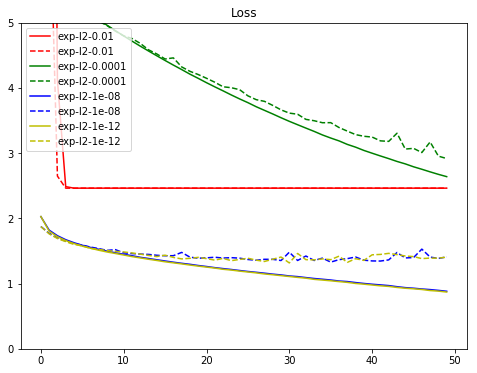

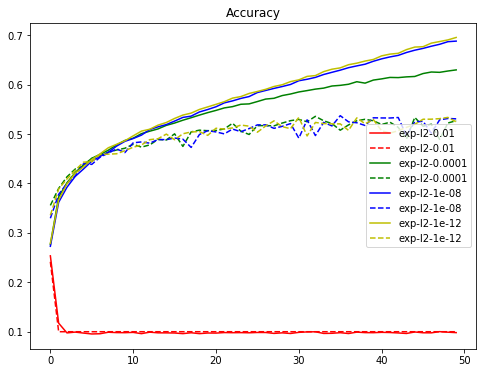

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()